- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [4]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

# 이미지 연산 (Image Operation)

- 이미지는 배열(array)로 표현가능하여 여러가지 연산 가능

- 이미지 다운로드 및 업로드

  - tree.jpg

  <img src="https://cdn.pixabay.com/photo/2020/08/22/00/24/tree-5507220_960_720.jpg" width="400">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%ED%8A%B8%EB%A6%AC-%EC%82%AC%EB%A7%89-%ED%92%8D%EA%B2%BD-%ED%86%A0%EC%A7%80-%EA%B0%80%EB%AD%84-5507220/</sub>



In [5]:
tree = cv2.imread('./img/tree.jpg')

tree.shape

(431, 640, 3)

In [6]:
cv2.imshow('', tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Pixel Value

In [7]:
temp_px = tree[200, 200]

temp_px

array([189, 207, 230], dtype=uint8)

In [8]:
temp_ch = tree[200, 200, 2]

temp_ch

230

## 값 변경

In [9]:
tree[100, 100] = [0, 0, 255]
tree[101, 100] = [0, 0, 255]
tree[102, 100] = [0, 0, 255]
tree[103, 100] = [0, 0, 255]
tree[104, 100] = [0, 0, 255]

In [10]:
cv2.imshow('', tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 인덱싱

In [11]:
tree[:100, :100].shape

(100, 100, 3)

In [12]:
cv2.imshow('', tree[:100, :100])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
white_box = tree[:100, :100]
white_box = [255, 255, 255]
tree[:100, :100] = white_box

In [14]:
cv2.imshow('', tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 ROI

- 이미지 작업시에는 특정 pixel단위 보다는 특정 영역단위로 작업을 하게 되는데 이것을 Region of Image(ROI)라고 함
  
- ROI 설정은 Numpy의 indexing 을 사용
  
  - 특정 영역을 copy 할 수도 있음

In [15]:
tree = cv2.imread('./img/tree.jpg')

tree.shape

(431, 640, 3)

In [16]:
cv2.imshow('', tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
t = tree[190:240, 290:350]

In [18]:
cv2.imshow('', t)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
tree[130:180, 310:370] = t

In [20]:
cv2.imshow('', tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
tree[200:250, 210:270] = t

In [22]:
cv2.imshow('', tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지의 Channels

- B, G, R로 구성된 채널을 분리, 합칠 수 있음

  - `cv2.split()`

  - `cv2.merge()`

In [23]:
b, g, r = cv2.split(tree)

In [24]:
b, b.shape

(array([[176, 167, 165, ..., 158, 165, 161],
        [158, 173, 183, ..., 178, 169, 169],
        [191, 195, 190, ..., 195, 193, 190],
        ...,
        [108, 151, 173, ...,   0,  28,  51],
        [111,  99, 109, ...,  14,  40,  30],
        [ 91,  82, 103, ...,  36,  27,  24]], dtype=uint8),
 (431, 640))

In [25]:
g, g.shape

(array([[163, 154, 154, ..., 143, 150, 147],
        [145, 162, 172, ..., 163, 155, 155],
        [181, 186, 181, ..., 182, 180, 178],
        ...,
        [ 90, 137, 165, ...,   3,  30,  53],
        [ 97,  89, 106, ...,  16,  41,  31],
        [ 78,  74, 105, ...,  36,  26,  22]], dtype=uint8),
 (431, 640))

In [26]:
r, r.shape

(array([[179, 170, 170, ..., 170, 177, 171],
        [161, 178, 188, ..., 190, 179, 179],
        [194, 199, 194, ..., 206, 204, 200],
        ...,
        [ 89, 141, 182, ...,   0,  24,  47],
        [ 98,  95, 122, ...,  10,  37,  27],
        [ 76,  75, 113, ...,  30,  22,  21]], dtype=uint8),
 (431, 640))

In [27]:
img = cv2.merge((b, g, r))

In [28]:
img.shape

(431, 640, 3)

In [29]:
cv2.imshow('', tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

- `cv2.split()` 함수는 비용이 많이 드는 함수이므로, 가능하다면 **Numpy indexing**을 사용하는 효율적!

- R 채널 0으로 값 변경

In [30]:
img[:, :, 2] = 0

In [31]:
img

array([[[176, 163,   0],
        [167, 154,   0],
        [165, 154,   0],
        ...,
        [158, 143,   0],
        [165, 150,   0],
        [161, 147,   0]],

       [[158, 145,   0],
        [173, 162,   0],
        [183, 172,   0],
        ...,
        [178, 163,   0],
        [169, 155,   0],
        [169, 155,   0]],

       [[191, 181,   0],
        [195, 186,   0],
        [190, 181,   0],
        ...,
        [195, 182,   0],
        [193, 180,   0],
        [190, 178,   0]],

       ...,

       [[108,  90,   0],
        [151, 137,   0],
        [173, 165,   0],
        ...,
        [  0,   3,   0],
        [ 28,  30,   0],
        [ 51,  53,   0]],

       [[111,  97,   0],
        [ 99,  89,   0],
        [109, 106,   0],
        ...,
        [ 14,  16,   0],
        [ 40,  41,   0],
        [ 30,  31,   0]],

       [[ 91,  78,   0],
        [ 82,  74,   0],
        [103, 105,   0],
        ...,
        [ 36,  36,   0],
        [ 27,  26,   0],
        [ 24,  22,   0]]

In [32]:
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- G 채널 0으로 값 변경

In [33]:
img[:, :, 1] = 0

In [34]:
img

array([[[176,   0,   0],
        [167,   0,   0],
        [165,   0,   0],
        ...,
        [158,   0,   0],
        [165,   0,   0],
        [161,   0,   0]],

       [[158,   0,   0],
        [173,   0,   0],
        [183,   0,   0],
        ...,
        [178,   0,   0],
        [169,   0,   0],
        [169,   0,   0]],

       [[191,   0,   0],
        [195,   0,   0],
        [190,   0,   0],
        ...,
        [195,   0,   0],
        [193,   0,   0],
        [190,   0,   0]],

       ...,

       [[108,   0,   0],
        [151,   0,   0],
        [173,   0,   0],
        ...,
        [  0,   0,   0],
        [ 28,   0,   0],
        [ 51,   0,   0]],

       [[111,   0,   0],
        [ 99,   0,   0],
        [109,   0,   0],
        ...,
        [ 14,   0,   0],
        [ 40,   0,   0],
        [ 30,   0,   0]],

       [[ 91,   0,   0],
        [ 82,   0,   0],
        [103,   0,   0],
        ...,
        [ 36,   0,   0],
        [ 27,   0,   0],
        [ 24,   0,   0]]

In [35]:
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
img[:, :, 0] = 0

cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 더하기
- `cv2.add()`

- `cv2.addWeighted()`

- `Numpy` 더하기 연산

- (참고)
  - `cv2.add()` : Saturation 연산
    - `Saturation` 연산은 한계값을 정하고 그 값을 벗어나는 경우는 모두 특정 값으로 계산하는 방식

    - 이미지에서는 0이하는 모두 0, 255이상은 모두 255로 표현
  
  - `Numpy` : modulo 연산
    - a와 b는 n으로 나눈 나머지 값이 같다라는 의미

    - 이미지에서는 연산의 결과가 256보다 큰 경우는 256으로 나눈 나머지 값으로 결정

In [37]:
import numpy as np
import cv2


In [56]:
x = np.array([[250]], np.uint8)
y = np.array([[10]], np.uint8)

- `cv2.add()` 연산

In [57]:
cv2.add(x, y)

array([[255]], dtype=uint8)

- `Numpy` 연산

In [40]:
x + y

array([4], dtype=uint8)

- 이미지1(dog1.jpg)

  <img src="https://cdn.pixabay.com/photo/2017/09/25/13/12/dog-2785074_960_720.jpg" width="300">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B0%9C-%EC%8A%AC%ED%94%88-%EB%8C%80%EA%B8%B0-%EC%A4%91-%EC%B8%B5-2785074//</sub>

<br>

- 이미지2(dog2.jpg)

  <img src="https://cdn.pixabay.com/photo/2017/09/25/13/14/dog-2785077_960_720.jpg" width="300">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B0%9C-%EB%9D%BC%EC%82%AC-%EC%82%AC-apso-%EB%8F%99%EB%AC%BC-2785077/</sub>

In [41]:
dog_1 = cv2.imread('./img/dog_1.jpg', cv2.IMREAD_COLOR)
dog_2 = cv2.imread('./img/dog_2.jpg', cv2.IMREAD_COLOR)

In [42]:
print(dog_1.shape)
print(dog_2.shape)

(427, 640, 3)
(427, 640, 3)


- `cv2.add()` 연산

In [43]:
res_1 = cv2.add(dog_1, dog_2)

In [44]:
cv2.imshow('', res_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

- `Numpy` 연산

In [45]:
res_2 = dog_1 + dog_2

In [46]:
cv2.imshow('', res_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 비트 연산
- AND, OR, NOT, XOR 연산
  - `bitwise_and` : 둘다 0이 아닌 경우만 값을 통과

  - `bitwise_or` : 둘중 하나가 0이 아니면 값을 통과

  - `bitwise_not` : 해당 값에 대해 부정값을 통과

  - `bitwise_xor` : 두 요소의 논리적 배타값 통과


* 이미지 다운로드

<img src="https://static.vecteezy.com/system/resources/previews/000/440/202/original/star-vector-icon.jpg" width="400">

<sub>출처: https://static.vecteezy.com/system/resources/previews/000/440/202/original/star-vector-icon.jpg</sub>




In [47]:
star = cv2.imread('./img/star.jpg')
black_img = np.zeros((5_120, 5_120, 3))

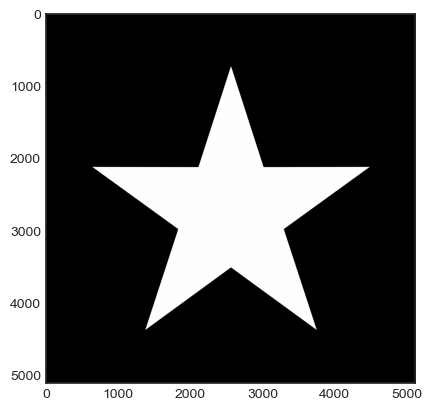

In [48]:
plt.imshow(star)
plt.show()

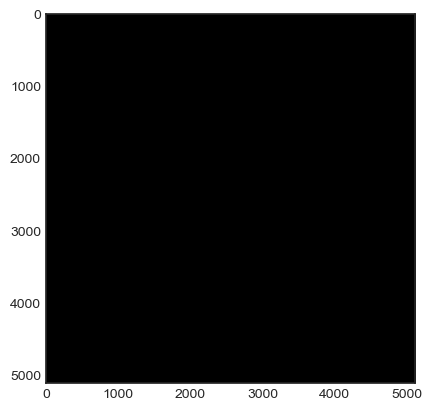

In [49]:
plt.imshow(black_img)
plt.show()

In [50]:
black_img[:, :2_560, :] = (255, 255, 255)

- 이미지의 dtype을 int형으로 변환

In [51]:
img = black_img.astype(np.uint8)

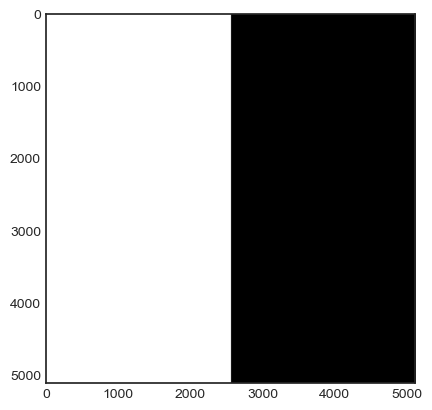

In [52]:
plt.imshow(img)
plt.show()

### bitwise_and 연산

In [53]:
res = cv2.bitwise_and(img, star)

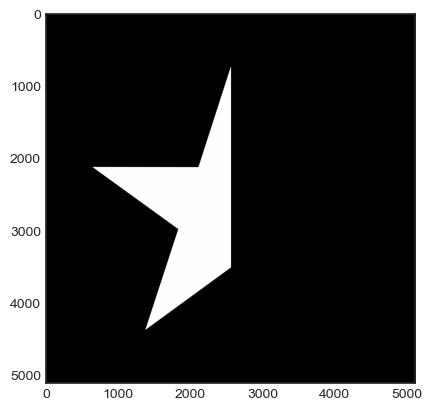

In [54]:
plt.imshow(res)
plt.show()

### bitwise_or 연산

In [55]:
cv2.__version__

'4.9.0'

### bitwise_not 연산

### bitwise_nor 연산

### 비트 연산 예시 - lenna 이미지에 OpenCV 로고 넣기


- 이미지 (OpenCV logo)
  - https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F2361FF4A586B8FFE1A

  <img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F2361FF4A586B8FFE1A" width="300">

![](https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png)

* https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png

- 삽입할 이미지의 row, col, channel정보

- 대상 이미지에서 삽입할 이미지의 영역을 추출

- mask를 만들기 위해서 logo 이미지를 gray scale로 변경후 binary image로 전환

- mask는 logo부분이 흰색(255), 바탕은 검은색(0)

- mask_inv는 logo부분이 검은색(0), 바탕은 흰색(255)

## Image Blending
- `cv2.addWeighted()` 사용하여 두 이미지를 bleding 할 수 있음

- blending 하려는 두 이미지의 사이즈가 같아야함

- [Simple Formula]  
  # $\quad g(x) = (1 - \alpha) f_0(x) + \alpha f_1(x)$

  <br>

  - $\beta = 1 - \alpha$

  -  $\alpha, \beta $ 의 값을 통해 어떤 이미지를 더 강하게 드러내고, 어떤 이미지를 더 약하게 드러낼지 결정

  - $\gamma$ 추가 가능 (optional)


- do-not-copy.jpg
  
  <img src="https://mdxenglish.files.wordpress.com/2014/08/do-not-copy.jpg" width="400">

  <sub>[이미지 출처] https://mdxenglish.com/do-not-copy-2/</sub>

- fashion.jpg

  <img src="https://cdn.pixabay.com/photo/2020/06/20/12/55/fashion-5320934_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/fashion-moda-girl-shoes-model-5320934/</sub>